Full Name: Trương Thanh Minh

Student ID: 21520064

**Experiment Requirements (for all datasets)**
- Train - test splitting ratio = 7:3.
- Random_state = 'Your Student ID'.
- Experiment with **Gradient Descent** (*max_iter = 200*, *learning_rate (eta)* is set by yourself) and **Normal Equation**.
- Visualize the cost trend (only for Gradient Descent)
- Evaluation Metric: **R2 score**.
- After completing all requirements, click on ‘Runtime’ and choose ‘Restart and run all’.
- If the code is run without any errors (and the results are the same as before re-running), download the .ipybn file and submit. 
Otherwise, check the code carefully.


# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sbn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

# Fish Dataset

🐟🐟 **Dataset Information (fish.csv)** 🐟🐟
- Weight: Weight of fish in gram
- Length1: Vertical length in cm
- Length2: Diagonal length in cm
- Length3: Cross length in cm
- Height: Height in cm
- Width: Diagonal width in cm

📚📚 **Problem Requirement** 📚📚

Use all remaining attributes to estimate the **weight** of fish.


**Note**: Try to make the Gradient Descent achieving the comparable performance to the Normal Equation model. ✌✌

**Hint**💡: Apply (suitable) techniques in Data Preprocessing tutorial file.

In [2]:
# Tải data từ drive
!gdown --id 1xvnkIndO_tmyXrP0_T7syikcxV_MEI4p

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1xvnkIndO_tmyXrP0_T7syikcxV_MEI4p
To: /content/fish.csv
100% 5.48k/5.48k [00:00<00:00, 5.12MB/s]


In [3]:
# Đọc data
fish_data = pd.read_csv('/content/fish.csv')

In [4]:
fish_data.head(10)

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340
5,450.0,26.8,29.7,34.7,13.6024,4.9274
6,500.0,26.8,29.7,34.5,14.1795,5.2785
7,390.0,27.6,30.0,35.0,12.6700,4.6900
8,450.0,27.6,30.0,35.1,14.0049,4.8438
9,500.0,28.5,30.7,36.2,14.2266,4.9594


In [5]:
fish_data.columns.values

array(['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width'],
      dtype=object)

In [6]:
fish_data.isna().sum()

Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

## Preprocessing

In [7]:
features_fish = fish_data.drop(columns = ['Weight'])
features_fish = features_fish.columns.values

In [8]:
X_fish = fish_data[features_fish]
y_fish = fish_data['Weight']

In [9]:
X_fish[:10]

,Length1,Length2,Length3,Height,Width
0,23.2,25.4,30.0,11.5200,4.0200
1,24.0,26.3,31.2,12.4800,4.3056
2,23.9,26.5,31.1,12.3778,4.6961
3,26.3,29.0,33.5,12.7300,4.4555
4,26.5,29.0,34.0,12.4440,5.1340
5,26.8,29.7,34.7,13.6024,4.9274
6,26.8,29.7,34.5,14.1795,5.2785
7,27.6,30.0,35.0,12.6700,4.6900
8,27.6,30.0,35.1,14.0049,4.8438
9,28.5,30.7,36.2,14.2266,4.9594


In [10]:
y_fish[:10]

0    242.0
1    290.0
2    340.0
3    363.0
4    430.0
5    450.0
6    500.0
7    390.0
8    450.0
9    500.0
Name: Weight, dtype: float64

In [11]:
print(X_fish.shape, y_fish.shape)

(159, 5) (159,)


In [12]:
# Chia tập dữ liệu theo tập train, test
X_train_fish, X_test_fish, y_train_fish, y_test_fish = train_test_split(X_fish, y_fish, test_size=0.3, random_state=21520064)

## Preprocessing

In [13]:
Xscaler = StandardScaler()
X_train_fish = Xscaler.fit_transform(X_train_fish)
X_test_fish = Xscaler.transform(X_test_fish)

In [14]:
Yscaler = StandardScaler()
y_train_fish = Yscaler.fit_transform(y_train_fish.values.reshape(-1, 1)).reshape(-1)
y_test_fish = Yscaler.transform(y_test_fish.values.reshape(-1, 1)).reshape(-1)

In [15]:
X_train_fish[:10]

array([[ 0.45621021,  0.49876435,  0.66171807,  1.56206504,  0.47448225],
       [-0.85819871, -0.85966293, -0.8379755 , -0.84341238, -0.81566469],
       [-0.4826533 , -0.47154085, -0.40949162, -0.37771704, -0.41088147],
       [-0.18617009, -0.1943108 , -0.11812258, -0.12673013,  0.16412394],
       [-1.29304076, -1.30323103, -1.3692955 , -1.27870567, -1.27069347],
       [ 1.30612875,  1.28424951,  1.1844684 , -0.31662154,  0.38226324],
       [-1.52034455, -1.56197908, -1.59210712, -1.69967211, -1.90697396],
       [-1.58952397, -1.6451481 , -1.66066454, -1.7269174 , -1.97339616],
       [ 0.48585853,  0.54496936,  0.73884517,  1.54892805,  0.99562685],
       [-0.05769403, -0.00949076,  0.13039807,  0.88391958, -0.03079211]])

In [16]:
y_train_fish[:10]

array([ 0.5513103 , -0.88957478, -0.66790015, -0.38945519, -1.01663219,
        0.33504237, -1.09178529, -1.10124701,  0.71351125, -0.14345042])

In [17]:
X_train_fish = np.array(X_train_fish)
X_test_fish = np.array(X_test_fish)
y_train_fish = np.array(y_train_fish)
y_test_fish = np.array(y_test_fish)

In [18]:
print("Shape of X_train_fish: ", X_train_fish.shape)
print("Shape of y_train_fish: ", y_train_fish.shape)
print("Shape of X_test_fish: ", X_test_fish.shape)
print("Shape of y_test_fish: ", y_test_fish.shape)

Shape of X_train_fish:  (111, 5)
Shape of y_train_fish:  (111,)
Shape of X_test_fish:  (48, 5)
Shape of y_test_fish:  (48,)


## Visualize data

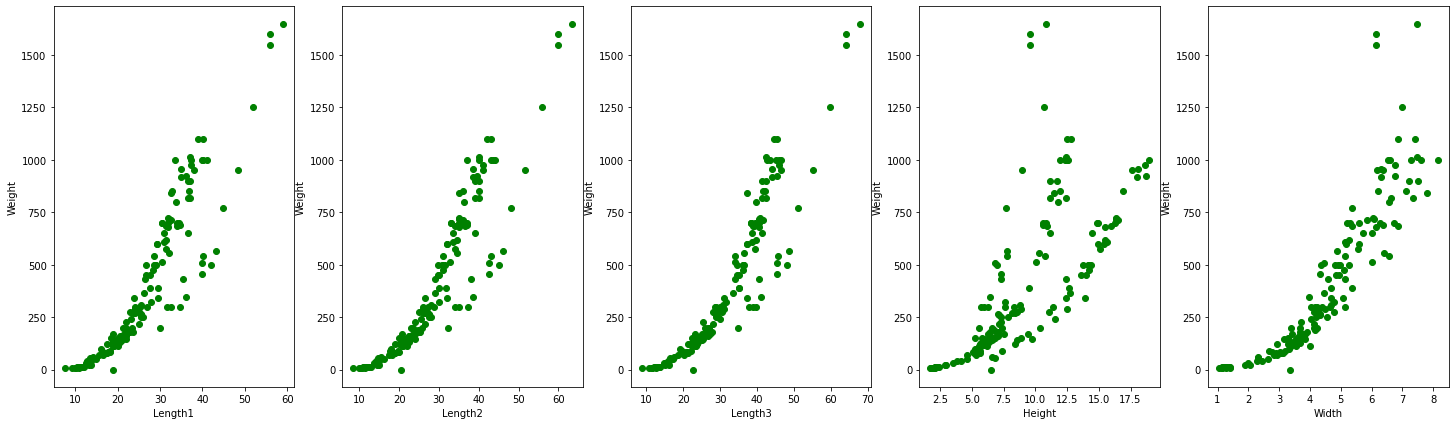

In [19]:
plt.figure(figsize=(25, 7))

for i in range(5):
  plt.subplot(1, 5, i + 1)
  plt.scatter(fish_data[features_fish[i]], y_fish, c='g')
  plt.xlabel(features_fish[i])
  plt.ylabel("Weight")

plt.show()

## Gradient Descent

In [20]:
class LinearRegression_GD:
  def __init__(self, eta=4e-4, max_iter=200, random_state=21520064):
    self.eta = eta
    self.max_iter = max_iter
    self.random_state = random_state
    self.W = None
    self.b = 0
    self.costs = []

  def predict(self, X):
    return np.dot(X, self.W) + self.b
  
  def fit(self, X, y):
    self.W = np.zeros(X.shape[1])
    self.b = 0
    self.cost = []
    for _ in range(self.max_iter):
      y_pred = self.predict(X)
      diff = y - y_pred
      dW = np.dot(X.T, diff)
      db = np.sum(diff)
      self.W += self.eta * dW
      self.b += self.eta * db
      cost = np.sum(diff ** 2) / 2
      self.cost.append(cost)
    return self.cost

  def MSE_score(self, X, y):
    y_pred = self.predict(X)
    return np.sum((y - y_pred) ** 2) / y.shape
  
  def R2_score(self, X, y):
    y_pred = self.predict(X)
    y_mean = np.mean(y)
    return (1 - (np.sum((y - y_pred)**2) / np.sum((y - y_mean)**2)))


  def visualize_cost(self, X, y):
    cost = self.fit(X, y)
    plt.plot(range(1, len(cost) + 1), cost)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Gradient Descent')
    plt.show()

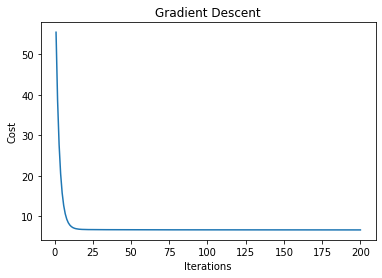

[55.500000000000014, 38.70879040197024, 27.695581636860727, 20.471607547050723, 15.732650501987635, 12.623413438365986, 10.582997288629025, 9.243566547670854, 8.36389511217586, 7.785786269491429, 7.405493335345595, 7.15497757396446, 6.989617314253608, 6.880147699000695, 6.807374843081999, 6.758709422877092, 6.725893431573005, 6.703509401537858, 6.688002761392051, 6.677040702170133, 6.669091723176671, 6.66314989771318, 6.658554044938795, 6.654869140480827, 6.651808542826417, 6.649182986507052, 6.646867128873822, 6.644777608524428, 6.64285865312721, 6.641072638224978, 6.639393892993578, 6.637804635464178, 6.636292304362232, 6.634847806962097, 6.633464367777382, 6.6321367713887565, 6.63086086385272, 6.6296332237890585, 6.62845094484048, 6.627311491262588, 6.626212601560784, 6.625152223720118, 6.624128471233512, 6.623139592845226, 6.622183951360732, 6.621260008470626, 6.620366313583442, 6.619501495349038, 6.618664255004986, 6.617853360973961, 6.617067644334213, 6.6163059949126675, 6.615567

In [21]:
linear_fish = LinearRegression_GD()
cost = linear_fish.fit(X_train_fish, y_train_fish)
linear_fish.visualize_cost(X_train_fish, y_train_fish)
print(cost)

In [22]:
# r2 score trên tập train
linear_fish.R2_score(X_train_fish, y_train_fish)

0.8814463089567366

In [23]:
# r2 score trên tập test
linear_fish.R2_score(X_test_fish, y_test_fish)

0.8680643260408483

## Normal Equation

$w = (X^TX)^{-1}X^Ty$

### From scatch

In [24]:
def pre_normal_equa(X):
  return np.concatenate([np.ones((len(X), 1)), X], axis=1)

def get_param_normal_equation(X, y):
  X = pre_normal_equa(X)
  return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

weight_best = get_param_normal_equation(X_train_fish, y_train_fish)

prediction = np.dot(pre_normal_equa(X_test_fish), weight_best)
print(r2_score(y_test_fish, prediction))

0.8677521436000287


In [25]:
X_test_fish[:, 0]

array([ 1.02941109, -0.146639  , -1.73776558, -0.92737813, -0.38382557,
        0.50562408,  0.7625762 ,  0.98987999,  0.3079686 ,  0.92070058,
        0.39691356, -0.99655754, -0.77913652, -0.2948806 ,  0.3474997 ,
       -0.00828016,  1.31601153, -0.85819871,  0.15972699, -0.28499783,
        0.75269342, -0.58148104, -0.8977298 , -0.36406002, -1.02620586,
        0.9503489 , -0.57159827, -0.68030878,  0.40679634,  1.03929386,
       -0.64077769, -1.29304076, -1.65870339,  1.49390146, -1.66858616,
       -0.61112936,  0.17949254, -0.73960542, -1.32268908, -1.59940675,
       -1.62905507,  2.11651621, -0.63089491, -1.46104791,  0.80210729,
       -0.16640454, -0.3344117 , -0.18617009])

In [26]:
prediction.shape

(48,)

In [27]:
y_test_fish.shape

(48,)

### From sklearn

In [28]:
LR_fish = LinearRegression()
LR_fish.fit(X_train_fish, y_train_fish)
y_pred = LR_fish.predict(X_test_fish)
print(r2_score(y_test_fish, y_pred))

0.8677521435999888


In [29]:
r2_score(y_test_fish, linear_fish.predict(X_test_fish))

0.8680643260408483

In [30]:
get_param_normal_equation(X_test_fish, y_test_fish)

array([-0.02521322,  3.82240734, -2.55317155, -0.87742971,  0.42124401,
        0.11592507])

In [31]:
X_test_fish.shape

(48, 5)

# Insurance Dataset

💰💰 **Dataset Information (insurance.csv)** 💰💰
- age: Age of primary beneficiary
- sex: Insurance contractor gender, female / male
- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to
- children: Number of children covered by health insurance / Number of dependents
- smoker: Smoker / Non-smoker
- region: The beneficiary's residential area in the US, northeast, southeast, southwest, northwest
- charges: Individual medical costs billed by health insurance

📚📚 **Problem Requirement** 📚📚

Use all remaining attributes to estimate the individual medical costs billed by health insurance ('**charges**')


**Note**: Try to make the Gradient Descent achieving the comparable performance to the Normal Equation model. ✌✌

**Hint**💡: Apply (suitable) techniques in the Data Preprocessing tutorial file.

In [32]:
!gdown --id 1mqn7V65PGN5Eb8IgItZajup9uFnC39ZK

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1mqn7V65PGN5Eb8IgItZajup9uFnC39ZK
To: /content/insurance.csv
100% 55.6k/55.6k [00:00<00:00, 32.3MB/s]


In [33]:
insurance_data = pd.read_csv('/content/insurance.csv')

In [34]:
insurance_data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [35]:
insurance_data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [36]:
# convert data
le = LabelEncoder()
label = le.fit_transform(insurance_data['smoker'])
insurance_data.drop("smoker", axis=1, inplace=True)
insurance_data["smoker"] = label

label = le.fit_transform(insurance_data['sex'])
insurance_data.drop("sex", axis=1, inplace=True)
insurance_data["sex"] = label

label = le.fit_transform(insurance_data['region'])
insurance_data.drop("region", axis=1, inplace=True)
insurance_data["region"] = label

In [37]:
insurance_data.head(10)

,age,bmi,children,charges,smoker,sex,region
0,19,27.900,0,16884.92400,1,0,3
1,18,33.770,1,1725.55230,0,1,2
2,28,33.000,3,4449.46200,0,1,2
3,33,22.705,0,21984.47061,0,1,1
4,32,28.880,0,3866.85520,0,1,1
5,31,25.740,0,3756.62160,0,0,2
6,46,33.440,1,8240.58960,0,0,2
7,37,27.740,3,7281.50560,0,0,1
8,37,29.830,2,6406.41070,0,1,0
9,60,25.840,0,28923.13692,0,0,1


In [38]:
features_insurance = insurance_data.drop(columns = ['charges'])
features_insurance = features_insurance.columns

In [39]:
X_insurance = insurance_data.drop(columns = ['charges'])
y_insurance = insurance_data['charges']

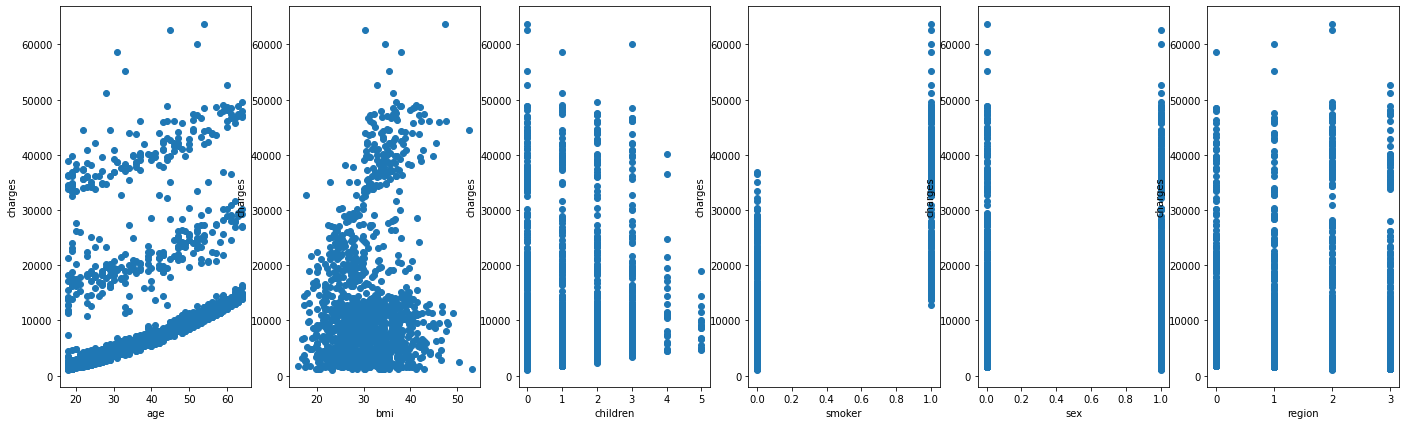

In [40]:
plt.figure(figsize=(24, 7))

for i in range(6):
  plt.subplot(1, 6, i + 1)
  plt.scatter(insurance_data[features_insurance[i]], y_insurance)
  plt.xlabel(features_insurance[i])
  plt.ylabel("charges")

plt.show()

In [41]:
X_train_insurance, X_test_insurance, y_train_insurance, y_test_insurance = train_test_split(X_insurance, y_insurance, test_size=0.3, random_state=21520064)

In [42]:
X_train_insurance[:10]

,age,bmi,children,smoker,sex,region
604,19,28.310,0,1,0,1
385,19,34.400,0,0,1,3
725,30,39.050,3,1,0,2
171,49,30.300,0,0,1,3
159,50,27.830,3,0,0,2
310,50,26.600,0,0,1,3
462,62,38.095,2,0,0,0
1138,33,30.250,0,0,1,2
269,49,25.840,1,0,1,0
815,20,31.460,0,0,0,2


In [43]:
y_train_insurance[:10]

604     17468.98390
385      1261.85900
725     40932.42950
171      8116.68000
159     19749.38338
310      8444.47400
462     15230.32405
1138     3704.35450
269      9282.48060
815      1877.92940
Name: charges, dtype: float64

## Preprocessing

In [44]:
# Scale data
Xscaler = StandardScaler()
X_train_insurance = Xscaler.fit_transform(X_train_insurance)
X_test_insurance = Xscaler.transform(X_test_insurance)
Yscaler = StandardScaler()
y_train_insurance = Yscaler.fit_transform(y_train_insurance.values.reshape(-1, 1)).reshape(-1)
y_test_insurance = Yscaler.transform(y_test_insurance.values.reshape(-1, 1)).reshape(-1)

In [45]:
X_train_insurance[:10]

array([[-1.4305391 , -0.39101844, -0.8870995 ,  1.87082869, -1.02817453,
        -0.47656568],
       [-1.4305391 ,  0.60389027, -0.8870995 , -0.53452248,  0.97259753,
         1.33303058],
       [-0.65140079,  1.36354963,  1.60387589,  1.87082869, -1.02817453,
         0.42823245],
       [ 0.69438356, -0.06591691, -0.8870995 , -0.53452248,  0.97259753,
         1.33303058],
       [ 0.76521431, -0.46943489,  1.60387589, -0.53452248, -1.02817453,
         0.42823245],
       [ 0.76521431, -0.67037705, -0.8870995 , -0.53452248,  0.97259753,
         1.33303058],
       [ 1.61518338,  1.20753357,  0.77355076, -0.53452248, -1.02817453,
        -1.38136381],
       [-0.43890853, -0.07408529, -0.8870995 , -0.53452248,  0.97259753,
         0.42823245],
       [ 0.69438356, -0.79453643, -0.05677437, -0.53452248,  0.97259753,
        -1.38136381],
       [-1.35970835,  0.12358951, -0.8870995 , -0.53452248, -1.02817453,
         0.42823245]])

In [46]:
y_train_insurance[:10]

array([ 0.30484839, -0.99663034,  2.18903052, -0.4461685 ,  0.48797102,
       -0.4198457 ,  0.12507756, -0.80049093, -0.35255136, -0.94715811])

## Gradient Descent

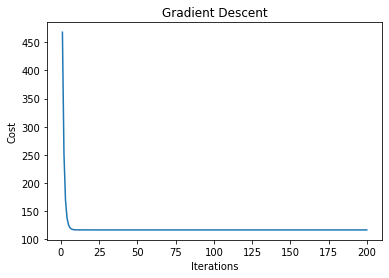

[468.0, 252.8752577257847, 170.10591267400707, 137.79129146721, 124.99365170997376, 119.85568807791141, 117.76632876743258, 116.90660748816305, 116.54904864132098, 116.39890919032294, 116.33532873977866, 116.3082027140369, 116.29655412367784, 116.29152352501238, 116.28934027096871, 116.28838868165656, 116.28797237070904, 116.28778964179149, 116.28770920631794, 116.28767370897172, 116.28765800778379, 116.28765104860696, 116.28764795838812, 116.28764658384549, 116.28764597148302, 116.28764569827442, 116.28764557621301, 116.28764552160814, 116.28764549714964, 116.28764548618089, 116.28764548125596, 116.28764547904211, 116.28764547804577, 116.28764547759685, 116.28764547739435, 116.2876454773029, 116.28764547726155, 116.28764547724283, 116.28764547723435, 116.2876454772305, 116.28764547722875, 116.28764547722795, 116.2876454772276, 116.28764547722741, 116.28764547722736, 116.28764547722733, 116.2876454772273, 116.28764547722729, 116.28764547722729, 116.28764547722727, 116.2876454772273, 11

In [47]:
linear_insurance = LinearRegression_GD()
cost = linear_insurance.fit(X_train_insurance, y_train_insurance)
linear_insurance.visualize_cost(X_train_insurance, y_train_insurance)
print(cost)

In [48]:
# R2 score trên tập train
linear_insurance.R2_score(X_train_insurance, y_train_insurance)

0.7515221250486597

In [49]:
# R2 score trên tập test
linear_insurance.R2_score(X_test_insurance, y_test_insurance)

0.7440063099104344

## Normal Equation

### From scratch

In [50]:
weight_best = get_param_normal_equation(X_train_insurance, y_train_insurance)
prediction = np.dot(pre_normal_equa(X_test_insurance), weight_best)
print(r2_score(y_test_insurance, prediction))

0.7440063099104344


### By sklearn

In [51]:
LR_insurance = LinearRegression()
LR_insurance.fit(X_train_insurance, y_train_insurance)
y_pred = LR_insurance.predict(X_test_insurance)
print(r2_score(y_test_insurance, y_pred))

0.7440063099104344


# Tesla Stock Dataset

📈📈 **Dataset Information (tesla_stock.csv)** 📈📈
- Open: The opening price of the stock
- High: The high price of that day
- Low: The low price of that day
- Close: The closed price of that day
- Volume: The amount of stocks traded during that day

📚📚 **Problem Requirement** 📚📚

Use all remaining attributes to predict the closing price of tesla stock ('**Close**')


**Note**: Try to make the Gradient Descent achieving the comparable performance to the Normal Equation model. ✌✌

**Hint**💡: Apply (suitable) techniques in the Data Preprocessing tutorial file.

In [52]:
!gdown --id 1GP8GjzCEV2HyqjRzz4E06gOUzfx8a86l

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1GP8GjzCEV2HyqjRzz4E06gOUzfx8a86l
To: /content/tesla_stock.csv
100% 111k/111k [00:00<00:00, 28.8MB/s]


In [53]:
tesla_stock_data = pd.read_csv('/content/tesla_stock.csv')

In [54]:
tesla_stock_data.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [55]:
tesla_stock_data.head(10)

,Open,High,Low,Close,Volume
0,19.000000,25.000000,17.540001,23.889999,18766300
1,25.790001,30.420000,23.299999,23.830000,17187100
2,25.000000,25.920000,20.270000,21.959999,8218800
3,23.000000,23.100000,18.709999,19.200001,5139800
4,20.000000,20.000000,15.830000,16.110001,6866900
5,16.400000,16.629999,14.980000,15.800000,6921700
6,16.139999,17.520000,15.570000,17.459999,7711400
7,17.580000,17.900000,16.549999,17.400000,4050600
8,17.950001,18.070000,17.000000,17.049999,2202500
9,17.389999,18.639999,16.900000,18.139999,2680100


In [56]:
features_tesla_stock = tesla_stock_data.drop(columns = ['Close'])
features_tesla_stock = features_tesla_stock.columns

In [57]:
X_tesla_stock = tesla_stock_data.drop(columns = ['Close'])
y_tesla_stock = tesla_stock_data['Close']

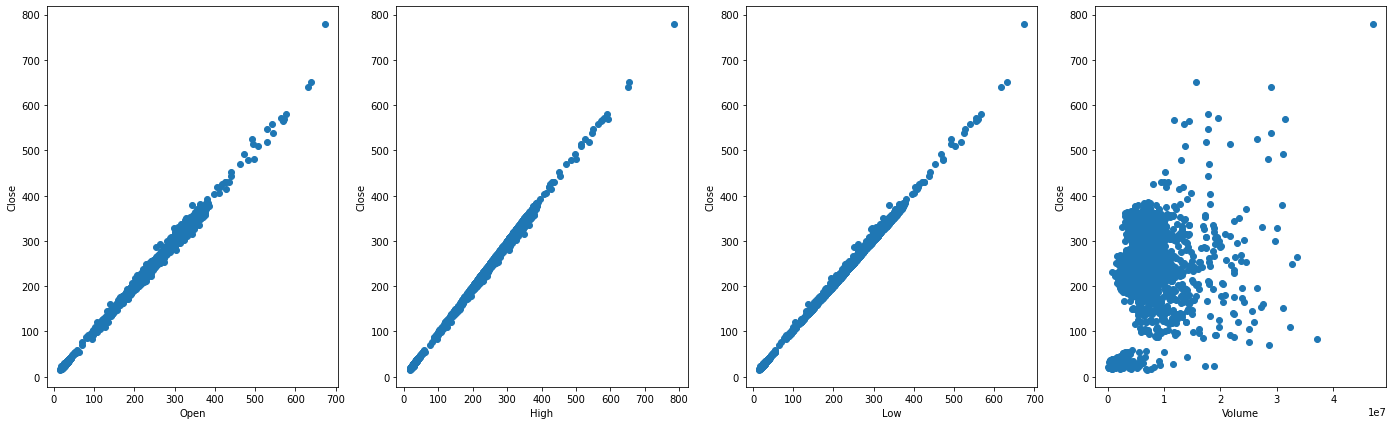

In [58]:
plt.figure(figsize=(24, 7))

for i in range(4):
  plt.subplot(1, 4, i + 1)
  plt.scatter(tesla_stock_data[features_tesla_stock[i]], y_tesla_stock)
  plt.xlabel(features_tesla_stock[i])
  plt.ylabel("Close")

plt.show()

In [59]:
X_train_tesla_stock, X_test_tesla_stock, y_train_tesla_stock, y_test_tesla_stock = train_test_split(X_tesla_stock, y_tesla_stock, test_size=0.3, random_state=21520064)

In [60]:
X_train_tesla_stock[:10]

,Open,High,Low,Volume
165,22.180000,22.500000,21.110001,1605600
228,27.020000,27.500000,26.600000,613700
1713,302.459991,306.619995,302.109985,3898000
286,26.129999,26.540001,25.830000,537700
1455,251.000000,258.989990,245.300003,9161700
1427,194.250000,195.949997,182.699997,6712200
1161,215.380005,217.929993,211.990005,3472400
102,31.570000,33.450001,31.500000,1529700
1732,317.589996,320.059998,315.140015,4152500
140,25.480000,25.639999,24.750000,1621700


In [61]:
y_train_tesla_stock[:10]

165      21.830000
228      26.719999
1713    305.519989
286      26.100000
1455    249.919998
1427    186.350006
1161    217.479996
102      33.400002
1732    317.010010
140      25.639999
Name: Close, dtype: float64

## Preprocessing

In [62]:
# Scale data
Xscaler = StandardScaler()
X_train_tesla_stock = Xscaler.fit_transform(X_train_tesla_stock)
X_test_tesla_stock = Xscaler.transform(X_test_tesla_stock)
Yscaler = StandardScaler()
y_train_tesla_stock = Yscaler.fit_transform(y_train_tesla_stock.values.reshape(-1, 1)).reshape(-1)
y_test_tesla_stock = Yscaler.transform(y_test_tesla_stock.values.reshape(-1, 1)).reshape(-1)

In [63]:
X_train_tesla_stock[:10]

array([[-1.37606367, -1.37540432, -1.37877012, -0.78243897],
       [-1.33514267, -1.33390839, -1.33158968, -0.9779399 ],
       [ 0.9936342 ,  0.98256054,  1.03611258, -0.33061285],
       [-1.34266741, -1.3418756 , -1.33820697, -0.99291931],
       [ 0.55855273,  0.58727024,  0.5478939 ,  0.70684883],
       [ 0.07874554,  0.06408957,  0.00991639,  0.2240587 ],
       [ 0.2573945 ,  0.24650566,  0.26163147, -0.41449751],
       [-1.29667355, -1.28452822, -1.28947962, -0.79739867],
       [ 1.12155465,  1.09410163,  1.14809122, -0.28045156],
       [-1.34816299, -1.34934488, -1.34748837, -0.77926571]])

In [64]:
y_train_tesla_stock[:10]

array([-1.37492715, -1.33372513,  1.01538055, -1.3389491 ,  0.5469076 ,
        0.01128122,  0.27357548, -1.27744093,  1.11219287, -1.34282496])

## Gradient Descent

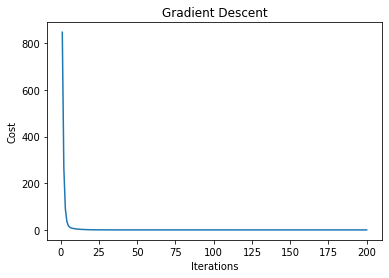

[845.5, 267.2128839377642, 91.04128446052974, 36.28954794911749, 18.387246869727953, 11.822289026516101, 8.872043061345458, 7.176932995024334, 5.997964585753067, 5.088955682640711, 4.3561560861328905, 3.7550727254304785, 3.258830081499917, 2.848166698448134, 2.508027583978852, 2.2262102795799423, 1.9926854394403053, 1.7991670591915425, 1.638796460243354, 1.5058925024340066, 1.3957482358304256, 1.3044634927487215, 1.2288064962360044, 1.1660992824338963, 1.1141227867464807, 1.071038203359753, 1.0353218232380417, 1.0057110390438886, 0.9811596028566216, 0.9608005509659553, 0.9439154818652076, 0.929909098749436, 0.918288114392505, 0.908643770867956, 0.9006373546765429, 0.8939881939898506, 0.8884637126765442, 0.8838711886626385, 0.8800509245724862, 0.8768705886431919, 0.8742205253753639, 0.8720098697469467, 0.8701633272922344, 0.8686185059439357, 0.8673237050886207, 0.866236083487843, 0.8653201411428116, 0.8645464613055027, 0.8638906680577336, 0.8633325625186404, 0.8628554070709422, 0.862445

In [65]:
linear_tesla_stock = LinearRegression_GD(eta=8e-5)
cost = linear_tesla_stock.fit(X_train_tesla_stock, y_train_tesla_stock)
linear_tesla_stock.visualize_cost(X_train_tesla_stock, y_train_tesla_stock)
print(cost)

In [66]:
# R2 score tren tap train
print(linear_tesla_stock.R2_score(X_train_tesla_stock, y_train_tesla_stock))

0.9989967663526852


In [67]:
# R2 score tren tap test
print(linear_tesla_stock.R2_score(X_test_tesla_stock, y_test_tesla_stock))

0.9991156143970229


## Normal Equation

### From scratch

In [68]:
weight_best = get_param_normal_equation(X_train_tesla_stock, y_train_tesla_stock)
prediction = np.dot(pre_normal_equa(X_test_tesla_stock), weight_best)
print(r2_score(y_test_tesla_stock, prediction))

0.9997050946951881


### By sklearn

In [69]:
LR_tesla_stock = LinearRegression()
LR_tesla_stock.fit(X_train_tesla_stock, y_train_tesla_stock)
y_pred = LR_tesla_stock.predict(X_test_tesla_stock)
print(r2_score(y_test_tesla_stock, y_pred))

0.9997050946951882
